## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/MRE/Desktop/Data Engineering/Final/fifa_eda_stats.csv")
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Data Wrangling

## Missing Value Analysis & Filling Missing Values

In [3]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

I'm going to dropped **Loaned From**, **Joined features** from dataset. There is no specific impact while calculating Wage.

In [4]:
df.drop('Loaned From', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [5]:
df.drop('Joined', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Accelerati

In [6]:
for column in df.columns:
    if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == object:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
df.isnull().sum()

C:\Users\MRE\AppData\Local\Temp/ipykernel_3816/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_3816/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_3816/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_3816/3315503910.py:2: DeprecationWarning

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

<h2>Outlier Detection</h2>

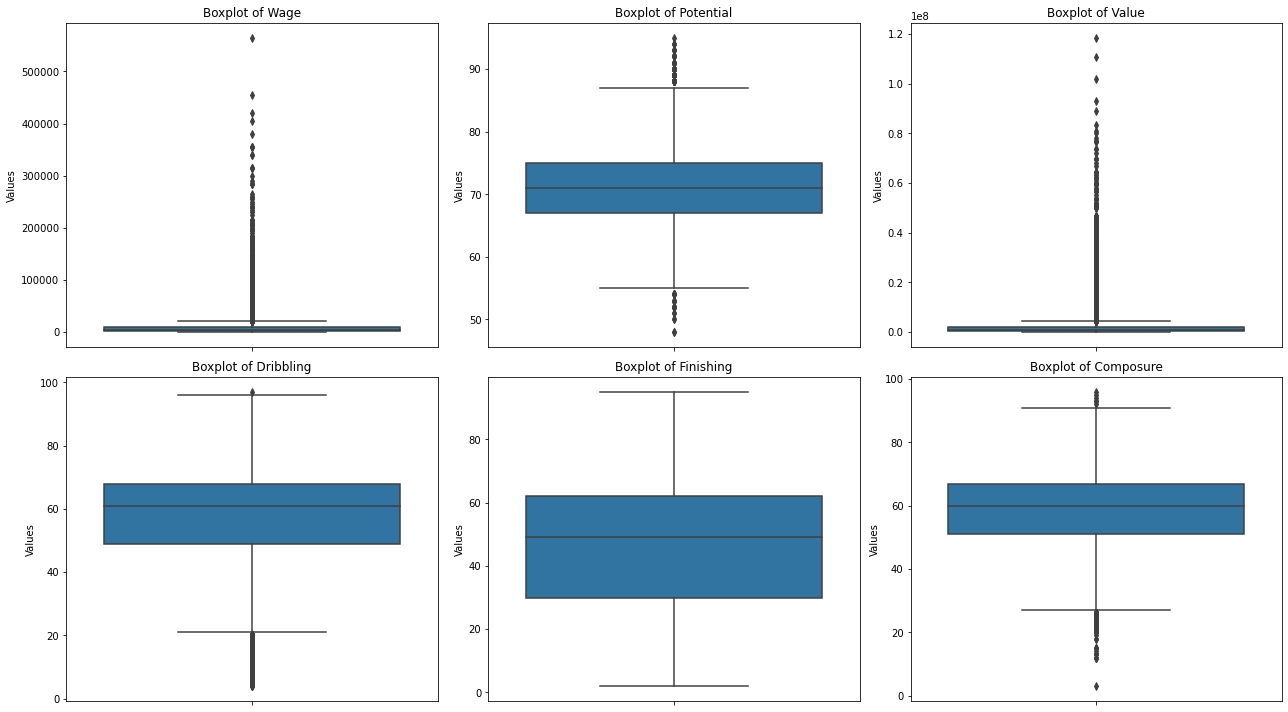

In [7]:
# Features that to be checked
features_to_check = ['Wage', 'Potential', 'Value', 'Dribbling', 'Finishing', 'Composure']

# Wage, Value cleaning & convert
df['Wage'] = df['Wage'].replace(r'[\€]', '', regex=True).apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x.replace('M', '')) * 1000000)
df['Value'] = df['Value'].replace(r'[\€]', '', regex=True).apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x.replace('M', '')) * 1000000)

#Boxplot Visualization
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [8]:
df.Value.value_counts().sort_values(ascending=True)

110500000.0      1
78000000.0       1
68000000.0       1
118500000.0      1
72000000.0       1
              ... 
450000.0       343
325000.0       351
425000.0       354
375000.0       372
1100000.0      431
Name: Value, Length: 217, dtype: int64

In [9]:
df.Wage.value_counts().sort_values(ascending=True)

565000.0       1
420000.0       1
455000.0       1
380000.0       1
225000.0       1
            ... 
5000.0       869
4000.0      1255
3000.0      1857
2000.0      2827
1000.0      4900
Name: Wage, Length: 144, dtype: int64

In [10]:
# Outlier Detection via Z-Score
z_scores = np.abs(stats.zscore(df[features_to_check]))
filtered_entries = (z_scores < 3).all(axis=1)
filtered_entries

0        False
1        False
2        False
3        False
4        False
         ...  
18202     True
18203     True
18204     True
18205     True
18206     True
Length: 18207, dtype: bool

In [11]:
df = df[filtered_entries]

## Standartization & Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

for col in numeric_cols:
    # Normalization
    df[col+'_normalized'] = min_max_scaler.fit_transform(df[[col]])
    # Standardizationb
    df[col+'_standardized'] = standard_scaler.fit_transform(df[[col]])
    
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKDiving_normalized,GKDiving_standardized,GKHandling_normalized,GKHandling_standardized,GKKicking_normalized,GKKicking_standardized,GKPositioning_normalized,GKPositioning_standardized,GKReflexes_normalized,GKReflexes_standardized
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0,Right,...,0.151163,-0.136263,0.108434,-0.371272,0.154762,-0.123820,0.082353,-0.488440,0.152941,-0.139501
108,120533,Pepe,35,Portugal,85,85,Beşiktaş JK,9000000.0,57000.0,Right,...,0.081395,-0.482683,0.168675,-0.069342,0.047619,-0.679910,0.094118,-0.428514,0.105882,-0.367129
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000000.0,15000.0,Right,...,0.139535,-0.193999,0.168675,-0.069342,0.107143,-0.370971,0.094118,-0.428514,0.129412,-0.253315
145,176769,Jonas,34,Brazil,84,84,SL Benfica,16500000.0,25000.0,Right,...,0.127907,-0.251736,0.120482,-0.310886,0.071429,-0.556334,0.082353,-0.488440,0.047059,-0.651665
147,167628,S. Ruffier,31,France,84,84,AS Saint-Étienne,19000000.0,41000.0,Right,...,0.941860,3.789830,1.000000,4.097294,0.904762,3.768806,0.988235,4.125816,0.952941,3.730186
191,199845,F. Acerbi,30,Italy,83,83,Lazio,19000000.0,64000.0,Left,...,0.116279,-0.309473,0.096386,-0.431658,0.095238,-0.432759,0.141176,-0.188813,0.117647,-0.310222
201,192593,D. Subašić,33,Croatia,83,83,AS Monaco,13000000.0,70000.0,Right,...,0.941860,3.789830,0.951807,3.855750,0.928571,3.892381,0.952941,3.946040,0.976471,3.844001
207,185221,Luiz Gustavo,30,Brazil,83,83,Olympique de Marseille,19000000.0,63000.0,Left,...,0.104651,-0.367209,0.060241,-0.612816,0.119048,-0.309183,0.129412,-0.248738,0.141176,-0.196408
212,178086,Adán,31,Spain,83,83,Atlético Madrid,15500000.0,55000.0,Left,...,0.930233,3.732094,1.000000,4.097294,0.916667,3.830593,0.976471,4.065890,0.964706,3.787093
213,178005,Rui Patrício,30,Portugal,83,83,Wolverhampton Wanderers,16500000.0,74000.0,Left,...,0.976744,3.963040,0.963855,3.916136,0.940476,3.954169,0.917647,3.766263,0.952941,3.730186


In [13]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot',
       ...
       'GKDiving_normalized', 'GKDiving_standardized', 'GKHandling_normalized',
       'GKHandling_standardized', 'GKKicking_normalized',
       'GKKicking_standardized', 'GKPositioning_normalized',
       'GKPositioning_standardized', 'GKReflexes_normalized',
       'GKReflexes_standardized'],
      dtype='object', length=143)

In [14]:
df.dtypes

ID                              int64
Name                           object
Age                             int64
Nationality                    object
Overall                         int64
                               ...   
GKKicking_standardized        float64
GKPositioning_normalized      float64
GKPositioning_standardized    float64
GKReflexes_normalized         float64
GKReflexes_standardized       float64
Length: 143, dtype: object

### ER-Diagram

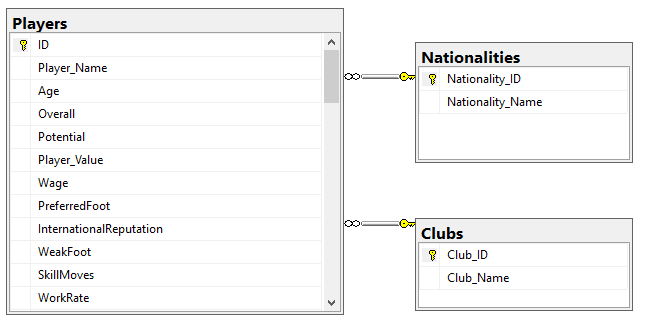

# Trends/Myths/Observations

<h4><a href="#reputation">Players with higher international reputation usually have higher salaries: </a></h4>
<p>Players who are famous worldwide often get paid more because they bring marketing value to their clubs.</p>

<h4><a href="#potential">Young players with high potential scores tend to have higher market values: </a></h4>
<p>Young players with high potential are likely to become big stars in the future, increasing their market value.</p>

<h4><a href="#market_value">Forwards usually have higher market values than players in other positions: </a></h4>
<p>Strikers or forwards who can score goals directly affect the outcomes of games, so they often have high market values.</p>

<h4><a href="#dribbling_and_finishing">Players with better dribbling and finishing skills have higher values: </a></h4>
<p>Players with good technical skills can make a big difference in games, which increases their market values.</p>

<h4><a href="#composure">Players with higher composure scores usually have higher salaries: </a></h4>
<p>Composure shows how well players perform under pressure. Players with high composure are valuable because they can handle stressful situations in important games.</p>



<h3><p id="reputation">Players with higher international reputation usually have higher salaries</p></h3>

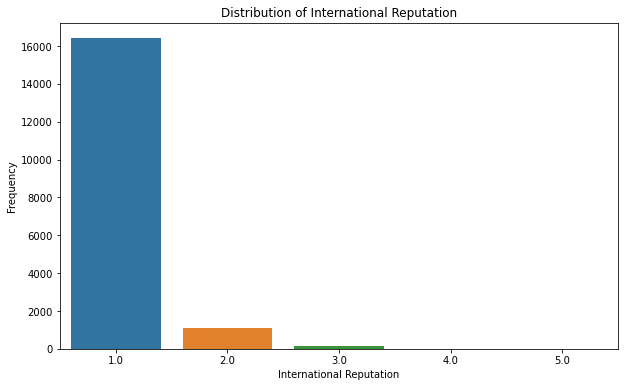

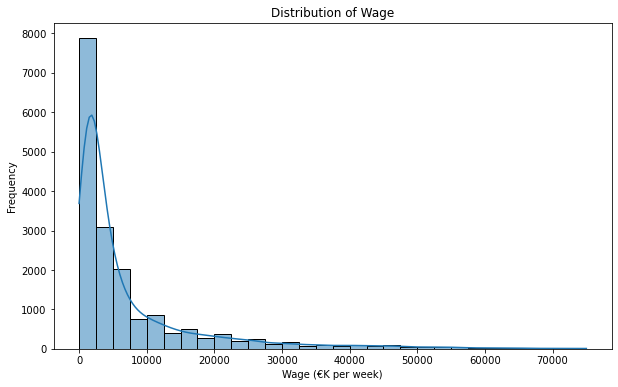

In [15]:
# International Reputation distributon graph
plt.figure(figsize=(10, 6))
sns.countplot(x='International Reputation', data=df)
plt.title('Distribution of International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Frequency')
plt.show()

# Wage distributon graph
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True)
plt.title('Distribution of Wage')
plt.xlabel('Wage (€K per week)')
plt.ylabel('Frequency')
plt.show()

Correlation Coefficient:  0.4851262620176009


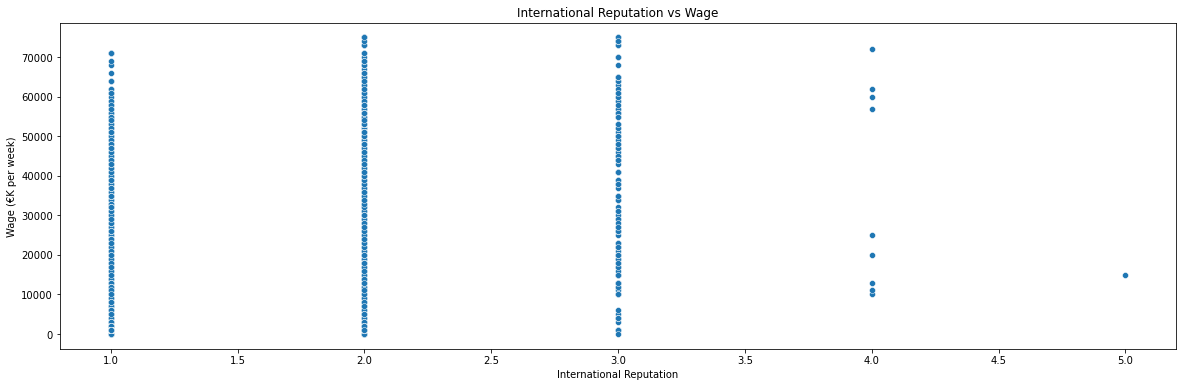

In [16]:
# Clearing & Transforming Wage Column
#df['Wage'] = df['Wage'].replace('[\€,K]', '', regex=True).astype(float)  # K euro cinsinden varsayıyorum

# Calculation of Correlation between International Reputation and Wage
correlation = df['International Reputation'].corr(df['Wage'])
print("Correlation Coefficient: ", correlation)

# Visual
plt.figure(figsize=(20, 6))
sns.scatterplot(x='International Reputation', y='Wage', data=df)
plt.title('International Reputation vs Wage')
plt.xlabel('International Reputation')
plt.ylabel('Wage (€K per week)')
plt.grid(False)
plt.show()

**Distribution of International Reputation:**

<p>Most players have a reputation level of 1, which is the lowest. Levels 2 and 3 are less common, and players at levels 4 and 5 are rare. This shows that players with high international fame are not common.</p>

**Distribution of Wages:**

<p>Looking at the wage distribution, most players earn low salaries. Most of the wages are concentrated between 0-10K Euros, with higher salaries being quite rare.</p>

**Relationship Between International Reputation and Wages:**

<p>This chart shows that as the reputation level increases, salaries generally go up. Especially, players at levels 4 and 5 earn much higher salaries, but there are very few players at these levels. So, these data might not always be completely accurate.
The variation in salaries, especially at higher reputation levels, indicates that wages are influenced by factors other than just fame.</p>

**Conclusion:**
<p>It seems like players with higher international reputation generally earn more, but this isn't always the case because there are not many players at the highest levels of fame. This observation must be taken with caution as the salaries can vary due to many factors, not just the reputation.</p>

<h3><p id="potential">Young players with high potential scores tend to have higher market values</p></h3>

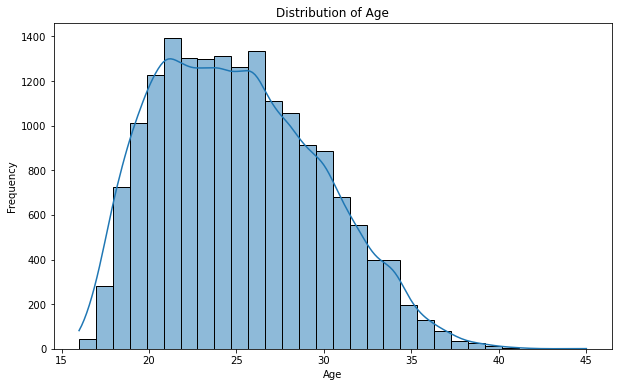

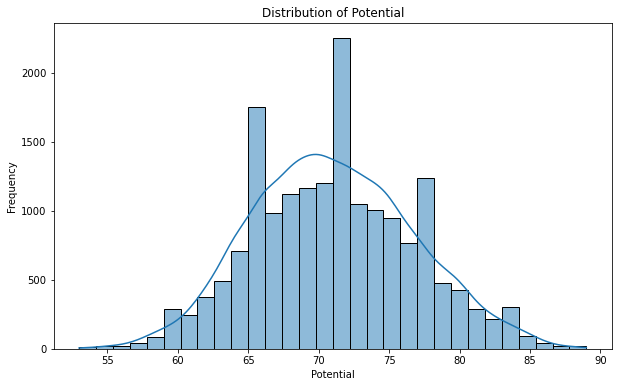

In [17]:
# Value column cleaning & casting
#df['Value'] = df['Value'].replace('[\€,M,K]', '', regex=True).astype(float)

# Age distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Potential distribution & Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Potential'], bins=30, kde=True)
plt.title('Distribution of Potential')
plt.xlabel('Potential')
plt.ylabel('Frequency')
plt.show()

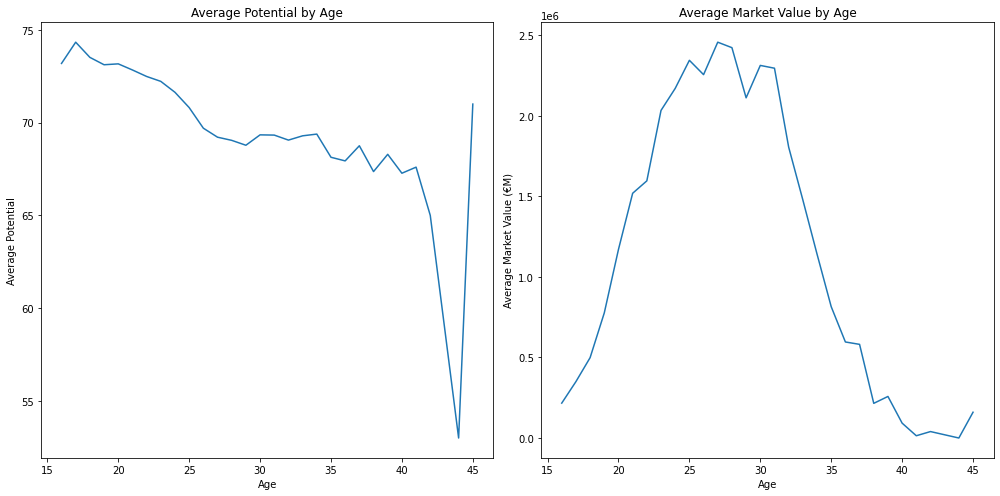

In [18]:
# Average Potential By Age
age_potential_avg = df.groupby('Age')['Potential'].mean().reset_index()

# Average Value By Age
age_value_avg = df.groupby('Age')['Value'].mean().reset_index()

# Visual
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y='Potential', data=age_potential_avg)
plt.title('Average Potential by Age')
plt.xlabel('Age')
plt.ylabel('Average Potential')

plt.subplot(1, 2, 2)
sns.lineplot(x='Age', y='Value', data=age_value_avg)
plt.title('Average Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Market Value (€M)')

plt.tight_layout()
plt.show()

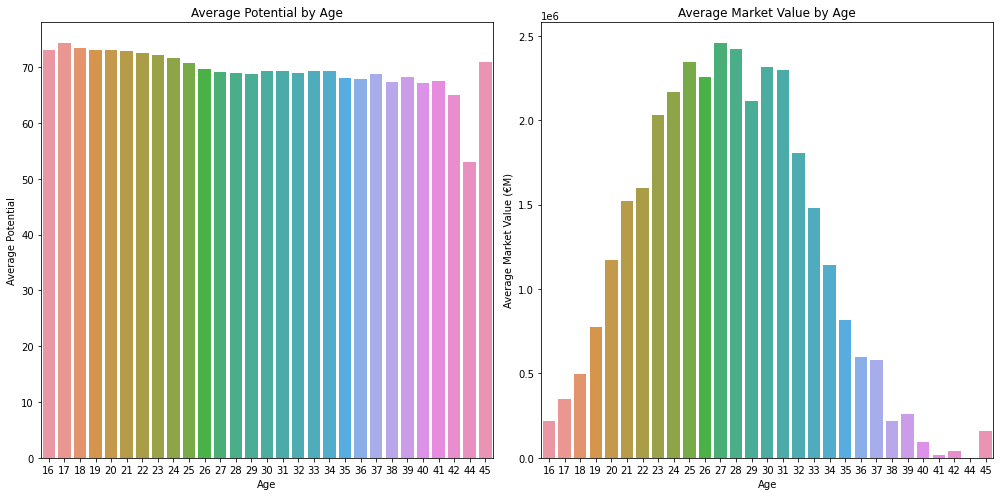

In [19]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Age', y='Potential', data=age_potential_avg)
plt.title('Average Potential by Age')
plt.xlabel('Age')
plt.ylabel('Average Potential')

plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='Value', data=age_value_avg)
plt.title('Average Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Market Value (€M)')

plt.tight_layout()
plt.show()

**Age Distribution:**

<p>The distribution of age is bell-shaped, with most players being between 20 and 30 years old. The peak is around the age of 25, and the number of players decreases sharply after 35.</p>

**Potential Distribution:**

<p>Potential scores are generally distributed between 60 and 80. The most frequent potential scores range from 65 to 75.</p>

**Average Potential by Age:**

<p>The average potential is high in younger players and decreases with age. It is highest in early 20s and shows a significant decline after the age of 30.</p>

**Average Market Value by Age:**
<p>The average market value peaks in the mid-20s. The highest market value is around the age of 25, and it decreases as age progresses.</p>

**Conclusion and Observation Verification:**
<p>Young players with high potential scores tend to have higher market values, as seen from the peak in market values around the ages where potential is also highest. This observation supports the hypothesis that young players with high potential are likely to become big stars in the future, increasing their market value. As players age, both potential and market value tend to decline, which aligns with the common trend in sports where younger players are more valued for their future growth prospects.</p>

<h3><p id="market_value">Forwards usually have higher market values than players in other positions</p></h3>

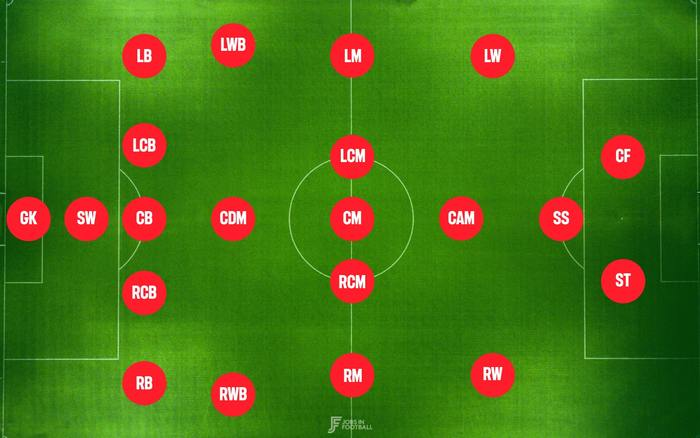

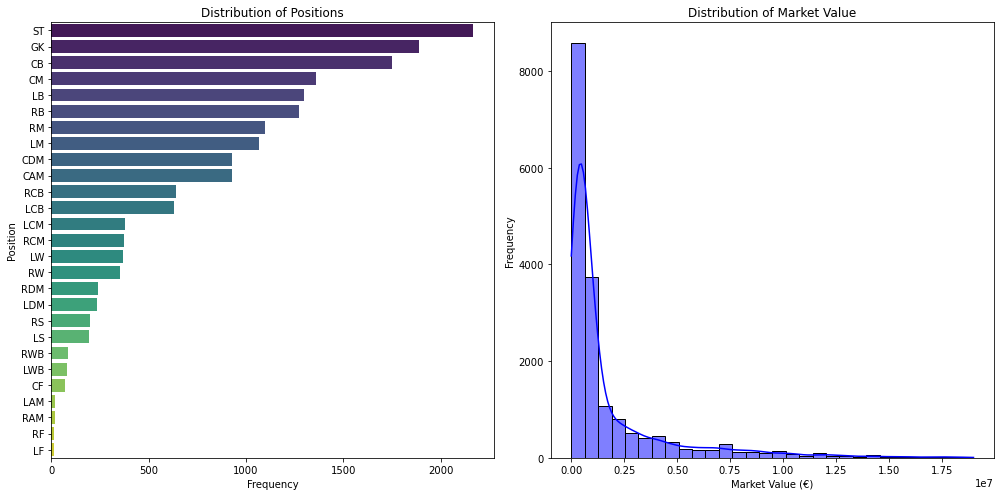

In [20]:
# Position Distribution Grapgh
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(y='Position', data=df, order = df['Position'].value_counts().index, palette='viridis')
plt.title('Distribution of Positions')
plt.xlabel('Frequency')
plt.ylabel('Position')

# Value Distribution Grapgh
plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Market Value')
plt.xlabel('Market Value (€)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

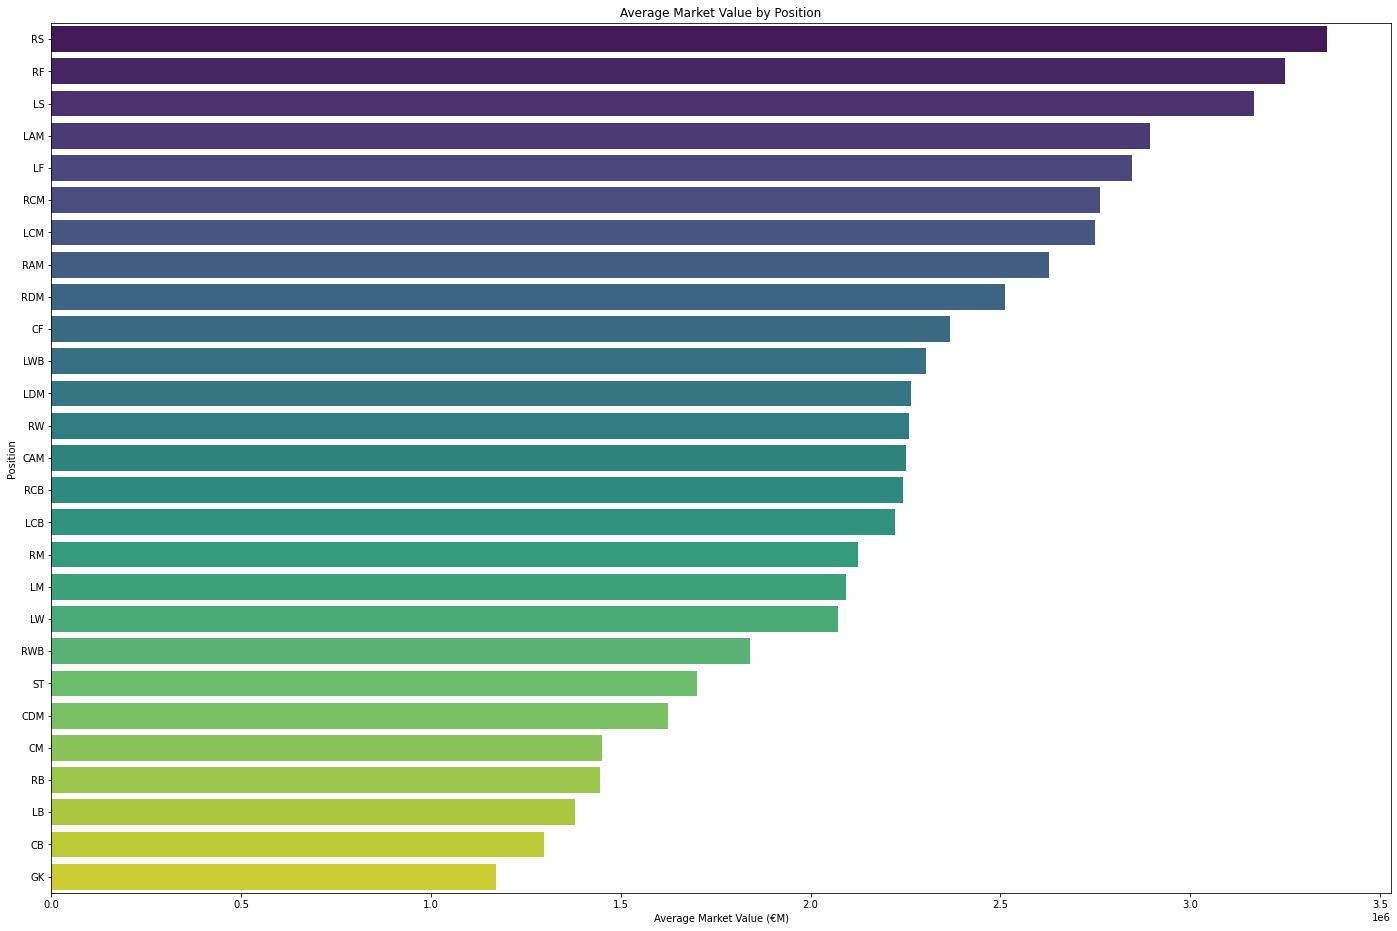

In [21]:
# Grouping as Positions and Avg. Value
position_value_avg = df.groupby('Position')['Value'].mean().sort_values(ascending=False).reset_index()

# Visual
plt.figure(figsize=(24, 16))
sns.barplot(x='Value', y='Position', data=position_value_avg, palette='viridis')
plt.title('Average Market Value by Position')
plt.xlabel('Average Market Value (€M)')
plt.ylabel('Position')
plt.show()

**Distribution of Positions:**

<p>This graph shows the distribution of players' positions. The striker (ST) position is the most common, followed by goalkeeper (GK) and center-back (CB). Other positions like defensive midfielders and wingers are less frequent.</p>

**Distribution of Market Value:**

<p>The market value distribution shows that most players have relatively low market values, with a significant number of players valued below 0.25 million Euros. A few players have exceptionally high market values.</p>

**Average Market Value by Position:**

<p>This chart displays that certain positions command higher average market values than others. Forward positions such as Right Winger (RW), Center Forward (CF), and Right Forward (RF) have the highest average market values, while defensive and goalkeeper positions have lower values.</p>

**Conclusion and Observation Verification:**

<p>Forwards generally have higher market values compared to players in other positions, as shown by the significant higher averages for forward positions in the market value distribution. This observation supports the hypothesis that players who can directly impact the outcomes of games, like forwards who score goals, tend to have higher market values. This aligns well with the typical understanding in football that attacking players often command higher fees due to their direct contribution to scoring and influencing match outcomes.</p>

<h3><p id="dribbling_and_finishing">Players with better dribbling and finishing skills have higher values</p></h3>

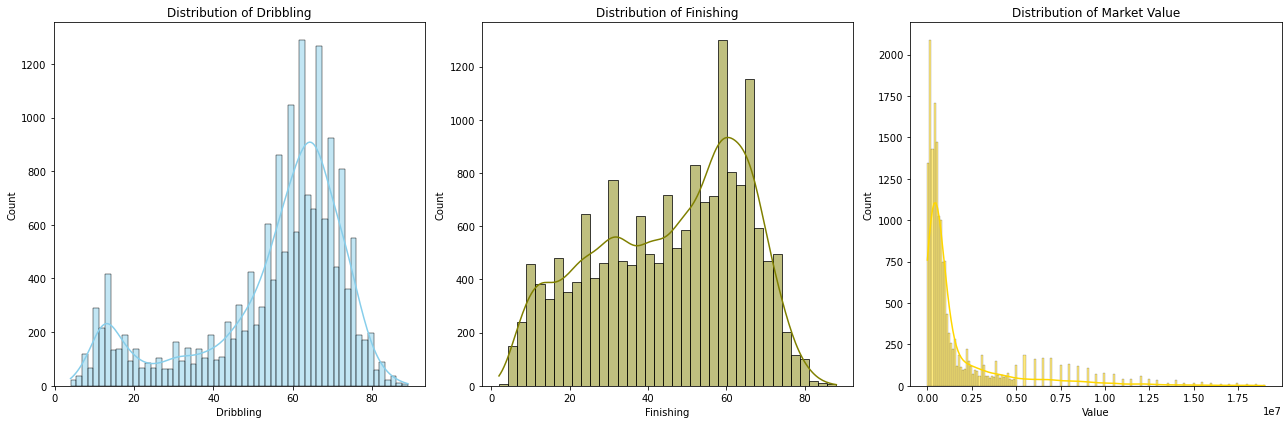

In [22]:
# Distribution Grapgh
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Dribbling'], kde=True, color='skyblue')
plt.title('Distribution of Dribbling')

plt.subplot(1, 3, 2)
sns.histplot(df['Finishing'], kde=True, color='olive')
plt.title('Distribution of Finishing')

plt.subplot(1, 3, 3)
sns.histplot(df['Value'], kde=True, color='gold')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()

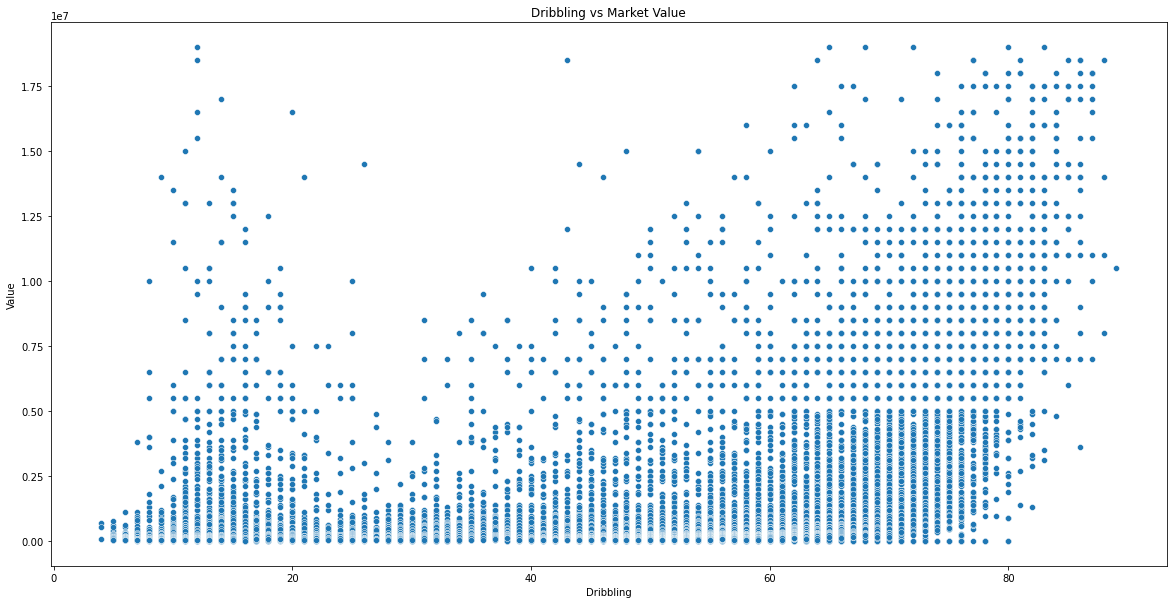

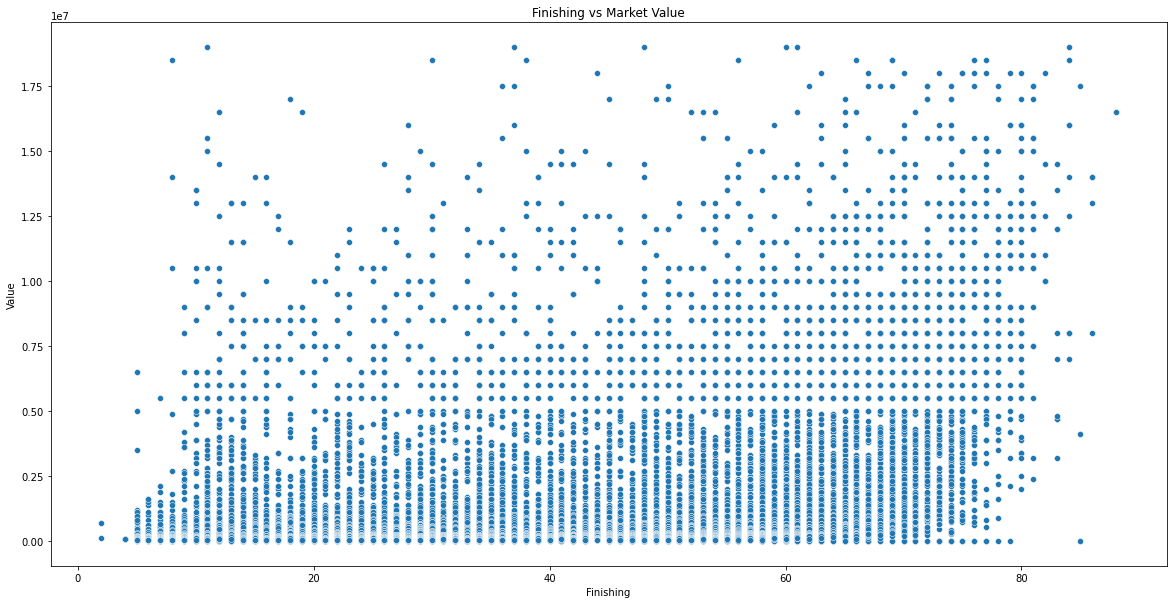

In [23]:
plt.figure(figsize=(20, 10))
#plt.subplot(1, 2, 1)
sns.scatterplot(x='Dribbling', y='Value', data=df)
plt.title('Dribbling vs Market Value')
plt.show()

plt.figure(figsize=(20, 10))
#plt.subplot(1, 2, 2)
sns.scatterplot(x='Finishing', y='Value', data=df)
plt.title('Finishing vs Market Value')
plt.show()

**Dribbling and Finishing Distribution:**

<p>The distribution graphs for dribbling and finishing skills show that most players have moderate levels of these skills. The highest concentration for dribbling is between 60-70, and for finishing, it's between 50-60.</p>

**Market Value Distribution:**

<p>The market value distribution indicates that the vast majority of players have low market values, with the majority concentrated below 0.25 million Euros.</p>

**Dribbling vs. Market Value Relationship:**

<p>The scatter plot showing the relationship between dribbling skills and market value indicates that higher dribbling skills generally correlate with higher market values. There's a visible trend that as dribbling improves, market values tend to increase.</p>

**Finishing vs. Market Value Relationship:**

<p>Similarly, players with higher finishing skills generally have higher market values. However, the market value among players with high finishing skills varies significantly.</p>

**Conclusion and Observation Verification:**

<p>Players with better dribbling and finishing skills tend to have higher market values. This is evident from the scatter plots, where we see a trend of increasing market value with higher skill levels in both dribbling and finishing. This supports the observation that technical skills in football, like dribbling and finishing, can significantly impact a player's market value, reflecting their potential to make a substantial difference in games.</p>

<h3><p id="composure">Players with higher composure scores usually have higher salaries</p></h3>

Correlation Matrix:
            Composure      Wage
Composure   1.000000  0.477979
Wage        0.477979  1.000000


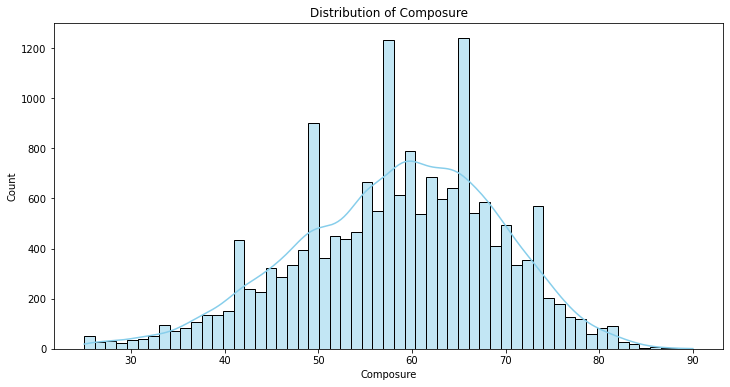

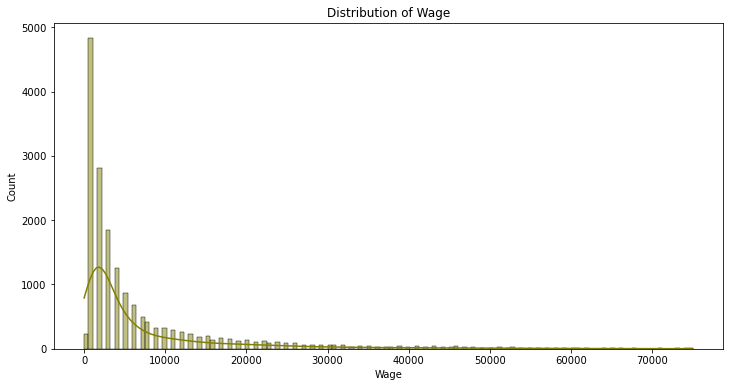

In [24]:
# Correlation Matrix
correlation_matrix = df[['Composure', 'Wage']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Distribution Grapgh
plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
sns.histplot(df['Composure'], kde=True, color='skyblue')
plt.title('Distribution of Composure')
plt.show()

plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 2)
sns.histplot(df['Wage'], kde=True, color='olive')
plt.title('Distribution of Wage')
plt.show()

#plt.tight_layout()
#plt.show()

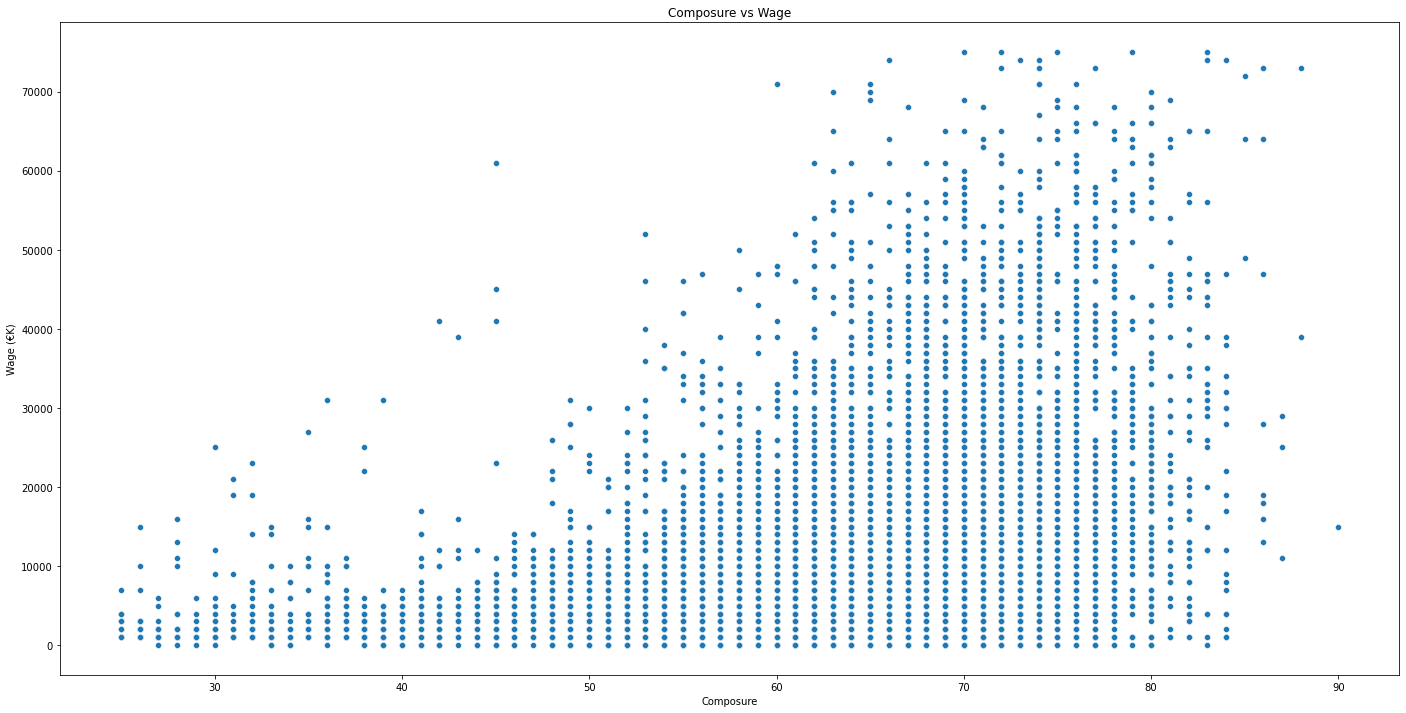

In [25]:
# Visualization
plt.figure(figsize=(24, 12))
sns.scatterplot(x='Composure', y='Wage', data=df)
plt.title('Composure vs Wage')
plt.xlabel('Composure')
plt.ylabel('Wage (€K)')
plt.show()

**Distribution of Composure:**

<p>The distribution of composure scores is concentrated mostly between 50 and 70, with the highest frequency around 60. Players with composure scores above 80 are quite rare.</p>

**Distribution of Wage:**

<p>The wage distribution shows that most players earn relatively low salaries, with the majority earning between 0 and 10,000 Euros. Higher salaries (above 20,000 Euros) are rare.</p>

**Composure vs. Wage Relationship:**

<p>The scatter plot indicates that players with higher composure scores usually have higher salaries. There is a noticeable trend of increasing salaries with higher composure scores, especially visible for players with scores above 70.</p>

**Conclusion and Observation Verification:**

<p>Players with higher composure scores generally have higher salaries. This observation is supported by the scatter plot, showing a trend where higher composure correlates with higher salaries. This suggests that players who perform well under pressure are valued higher, reflecting in their salaries. However, the limited number of players with very high composure scores suggests that these observations might be influenced by outlier data, so while the trend is noticeable, it should be considered with caution.</p>